# **IMPORTACION DE LA DATA Y LIBRERIAS**

In [ ]:
#IMPORTANDO LIBRERIAS

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split


warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',200)

# **EXPLORACION DE DATOS**

In [ ]:
#LEYENDA LA DATA
df = pd.read_csv('application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#REVISANDO EL TAMAÑO DEL DATAFRAME
df.shape

(307511, 122)

In [ ]:
#SABER LA CANTIDAD DE VALORES NULOS POR COLUMNA
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [ ]:
#SABER EL PORCENTAJE DE VALORES NULOS POR COLUMNA
round(((df.isnull().sum() / len(df))*100),2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [ ]:
#SABER EL TIPO DE DATOS DE CADA COLUMNA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# **PREPARACION DE DATOS**

In [ ]:
#ELIMINANDO LAS COLUMNAS QUE TIENEN VALORES NULOS MAYOR AL 50%
df = df.dropna(thresh = (len(df)*0.50), axis=1)

In [ ]:
#CAMBIANDO COLUMNAS CON TIPO OBJECT A VALORES CATEGORICOS
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [ ]:
#CAMBIANDO COLUMNAS CON VALORES NULOS A SU PROMEDIO
df.AMT_GOODS_PRICE.fillna(df.AMT_GOODS_PRICE.mean(), inplace=True)
df.AMT_ANNUITY.fillna(df.AMT_ANNUITY.mean(), inplace=True)
df.CNT_FAM_MEMBERS.fillna(df.CNT_FAM_MEMBERS.mean(), inplace=True)
df.EXT_SOURCE_2.fillna(df.EXT_SOURCE_2.mean(), inplace=True)
df.EXT_SOURCE_3.fillna(df.EXT_SOURCE_3.mean(), inplace=True)           
df.YEARS_BEGINEXPLUATATION_AVG.fillna(df.YEARS_BEGINEXPLUATATION_AVG.mean(), inplace=True)
# df.ENTRANCES_AVG.fillna(df.ENTRANCES_AVG.mean(), inplace=True)
df.FLOORSMAX_AVG.fillna(df.FLOORSMAX_AVG.mean(), inplace=True)
# df.LIVINGAREA_AVG.fillna(df.LIVINGAREA_AVG.mean(), inplace=True)
df.YEARS_BEGINEXPLUATATION_MODE.fillna(df.YEARS_BEGINEXPLUATATION_MODE.mean(), inplace=True)    
# df.ENTRANCES_MODE.fillna(df.ENTRANCES_MODE.mean(), inplace=True)                  
df.FLOORSMAX_MODE.fillna(df.FLOORSMAX_MODE.mean(), inplace=True)                  
# df.LIVINGAREA_MODE.fillna(df.LIVINGAREA_MODE.mean(), inplace=True)                
df.YEARS_BEGINEXPLUATATION_MEDI.fillna(df.YEARS_BEGINEXPLUATATION_MEDI.mean(), inplace=True)    
# df.ENTRANCES_MEDI.fillna(df.ENTRANCES_MEDI.mean(), inplace=True)                  
df.FLOORSMAX_MEDI.fillna(df.FLOORSMAX_MEDI.mean(), inplace=True)                  
# df.LIVINGAREA_MEDI.fillna(df.LIVINGAREA_MEDI.mean(), inplace=True)                 
df.TOTALAREA_MODE.fillna(df.TOTALAREA_MODE.mean(), inplace=True)                  
df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(df.OBS_30_CNT_SOCIAL_CIRCLE.mean(), inplace=True)        
df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(df.DEF_30_CNT_SOCIAL_CIRCLE.mean(), inplace=True)        
df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(df.OBS_60_CNT_SOCIAL_CIRCLE.mean(), inplace=True)        
df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(df.DEF_60_CNT_SOCIAL_CIRCLE.mean(), inplace=True)        
df.DAYS_LAST_PHONE_CHANGE.fillna(df.DAYS_LAST_PHONE_CHANGE.mean(), inplace=True)          
df.FLAG_DOCUMENT_2.fillna(df.FLAG_DOCUMENT_2.mean(), inplace=True)                 
df.FLAG_DOCUMENT_3.fillna(df.FLAG_DOCUMENT_3.mean(), inplace=True)                 
df.FLAG_DOCUMENT_4.fillna(df.FLAG_DOCUMENT_4.mean(), inplace=True)                 
df.FLAG_DOCUMENT_5.fillna(df.FLAG_DOCUMENT_5.mean(), inplace=True)                 
df.FLAG_DOCUMENT_6.fillna(df.FLAG_DOCUMENT_6.mean(), inplace=True)                 
df.FLAG_DOCUMENT_7.fillna(df.FLAG_DOCUMENT_7.mean(), inplace=True)                 
df.FLAG_DOCUMENT_8.fillna(df.FLAG_DOCUMENT_8.mean(), inplace=True)                 
df.FLAG_DOCUMENT_9.fillna(df.FLAG_DOCUMENT_9.mean(), inplace=True)                 
df.FLAG_DOCUMENT_10.fillna(df.FLAG_DOCUMENT_10.mean(), inplace=True)                
df.FLAG_DOCUMENT_11.fillna(df.FLAG_DOCUMENT_11.mean(), inplace=True)                
df.FLAG_DOCUMENT_12.fillna(df.FLAG_DOCUMENT_12.mean(), inplace=True)                
df.FLAG_DOCUMENT_13.fillna(df.FLAG_DOCUMENT_13.mean(), inplace=True)                
df.FLAG_DOCUMENT_14.fillna(df.FLAG_DOCUMENT_14.mean(), inplace=True)                
df.FLAG_DOCUMENT_15.fillna(df.FLAG_DOCUMENT_15.mean(), inplace=True)                
df.FLAG_DOCUMENT_16.fillna(df.FLAG_DOCUMENT_16.mean(), inplace=True)                
df.FLAG_DOCUMENT_17.fillna(df.FLAG_DOCUMENT_17.mean(), inplace=True)                
df.FLAG_DOCUMENT_18.fillna(df.FLAG_DOCUMENT_18.mean(), inplace=True)                
df.FLAG_DOCUMENT_19.fillna(df.FLAG_DOCUMENT_19.mean(), inplace=True)                
df.FLAG_DOCUMENT_20.fillna(df.FLAG_DOCUMENT_20.mean(), inplace=True)                
df.FLAG_DOCUMENT_21.fillna(df.FLAG_DOCUMENT_21.mean(), inplace=True)                
df.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df.AMT_REQ_CREDIT_BUREAU_HOUR.mean(), inplace=True)      
df.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df.AMT_REQ_CREDIT_BUREAU_DAY.mean(), inplace=True)       
df.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df.AMT_REQ_CREDIT_BUREAU_WEEK.mean(), inplace=True)      
df.AMT_REQ_CREDIT_BUREAU_MON.fillna(df.AMT_REQ_CREDIT_BUREAU_MON.mean(), inplace=True)       
df.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df.AMT_REQ_CREDIT_BUREAU_QRT.mean(), inplace=True)       
df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df.AMT_REQ_CREDIT_BUREAU_YEAR.mean(), inplace=True)

In [ ]:
#CAMBIANDO EL VALOR DE LAS COLUMNAS A ENTEROS
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].astype(int, errors='ignore')
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].astype(int, errors='ignore')
df['OBS_30_CNT_SOCIAL_CIRCLE'] = df['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')
df['DEF_30_CNT_SOCIAL_CIRCLE'] = df['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int, errors='ignore')
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].astype(int, errors='ignore')
df['AMT_REQ_CREDIT_BUREAU_HOUR'] = df['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int, errors='ignore')
df['DAYS_BIRTH'] = (abs(df['DAYS_BIRTH'])//365.25).astype(int)

In [ ]:
#VEMOS COMO HAN CAMBIADO LOS VALORES
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0.000,0.000000,0.000000,0.000000,1.000000
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0.000,0.000000,0.000000,0.000000,0.000000
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0.000,0.000000,0.000000,0.000000,0.000000
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0.007,0.034362,0.267395,0.265474,1.899974
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0.000,0.000000,0.000000,0.000000,0.000000


In [ ]:
#SABER EL TIPO DE DATOS DE CADA COLUMNA LUEGO DEL CAMBIO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  int8   
 3   CODE_GENDER                   307511 non-null  int8   
 4   FLAG_OWN_CAR                  307511 non-null  int8   
 5   FLAG_OWN_REALTY               307511 non-null  int8   
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307511 non-null  float64
 11  NAME_TYPE_SUITE               307511 non-null  int8   
 12  NAME_INCOME_TYPE              307511 non-nul

# **ANALISIS EXPLORATORIO**

Informes de valores atípicos para variables continuas

In [ ]:
def df_boxplot_outlier(var_cont):
    
    plt.figure(figsize=(12,6))
    
    sns.boxplot(y=var_cont, data=df, palette='Spectral')
    plt.title('Distribucion de '+ '%s' %var_cont, weight='bold', fontsize=10)
    plt.xlabel(var_cont)
    plt.xticks(rotation=90)
    plt.ylabel('Numero de casos')
    
    plt.show()

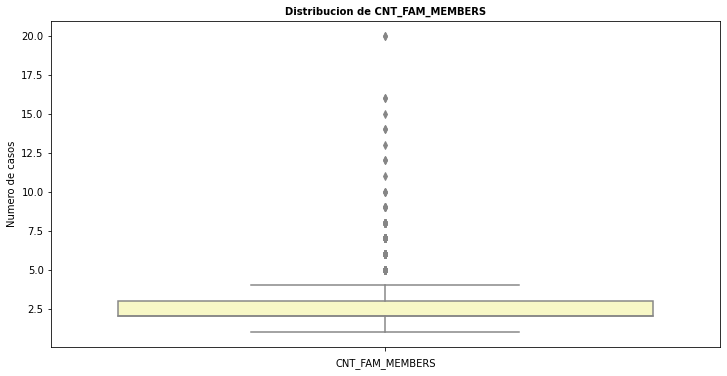

In [ ]:
#CANTIDAD DE FAMILIARES
df_boxplot_outlier('CNT_FAM_MEMBERS')

In [ ]:
df['CNT_FAM_MEMBERS'].describe()

count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

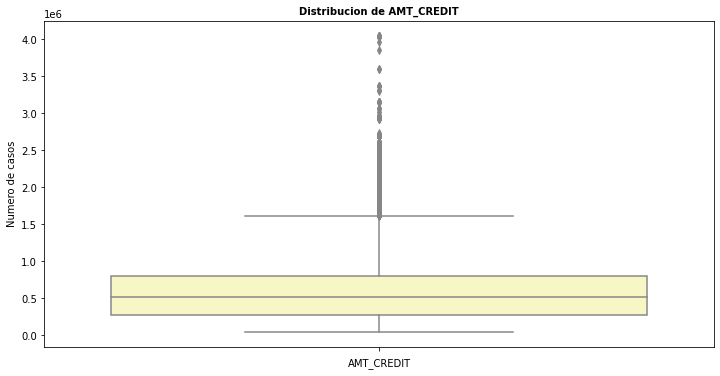

In [ ]:
#CANTIDAD DE CREDITO
df_boxplot_outlier('AMT_CREDIT')

In [ ]:
df['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [ ]:
#SABER EL PORCENTAJE DE VALORES NULOS POR COLUMNA
round(100*(df.isnull().sum()/len(df)),2)

SK_ID_CURR                      0.0
TARGET                          0.0
NAME_CONTRACT_TYPE              0.0
CODE_GENDER                     0.0
FLAG_OWN_CAR                    0.0
FLAG_OWN_REALTY                 0.0
CNT_CHILDREN                    0.0
AMT_INCOME_TOTAL                0.0
AMT_CREDIT                      0.0
AMT_ANNUITY                     0.0
AMT_GOODS_PRICE                 0.0
NAME_TYPE_SUITE                 0.0
NAME_INCOME_TYPE                0.0
NAME_EDUCATION_TYPE             0.0
NAME_FAMILY_STATUS              0.0
NAME_HOUSING_TYPE               0.0
REGION_POPULATION_RELATIVE      0.0
DAYS_BIRTH                      0.0
DAYS_EMPLOYED                   0.0
DAYS_REGISTRATION               0.0
DAYS_ID_PUBLISH                 0.0
FLAG_MOBIL                      0.0
FLAG_EMP_PHONE                  0.0
FLAG_WORK_PHONE                 0.0
FLAG_CONT_MOBILE                0.0
FLAG_PHONE                      0.0
FLAG_EMAIL                      0.0
OCCUPATION_TYPE             

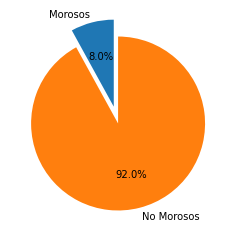

In [ ]:
#REVISANDO EL DESBALANCE DE DATOS PARA LA COLUMNA TARGET
Defaulter = round((df['TARGET'].value_counts()[1]/len(df)),2)
Non_Defaulter = round((df['TARGET'].value_counts()[0]/len(df)),2)
explode= (0.1,0.1)
client = [Defaulter, Non_Defaulter]
labels = 'Morosos', 'No Morosos'
plt.pie(client, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)
plt.show()

In [ ]:
df0 = df[df.TARGET==0] #dataset para clientes no morosos
df1 = df[df.TARGET==1] #dataset para clientes morosos

Características categóricas univariadas

In [ ]:
def df_plot_unnivariate_cat(var):
    
    plt.figure(figsize=(16,6))
    
    plt.subplot(1, 2, 1)
    sns.countplot(var, data=df0, palette= 'Spectral', order= df0[var].value_counts().index)
    plt.title('Distribucion de '+ '%s' %var +' para no morosos', weight='bold', fontsize=10)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Numero de casos para clientes no morosos')
    
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=df1, palette='Spectral', order= df1[var].value_counts().index)
    plt.title('Distribucion de '+ '%s' %var +' para morosos', weight='bold',fontsize=10)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Numero de casos para clientes morosos')
    
    plt.show()

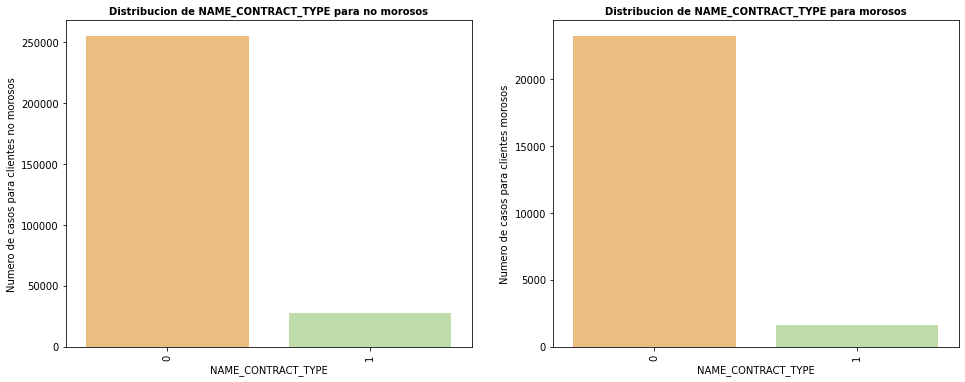

In [ ]:
#NOMBRE DE TIPO DE CONTRATO
df_plot_unnivariate_cat('NAME_CONTRACT_TYPE')

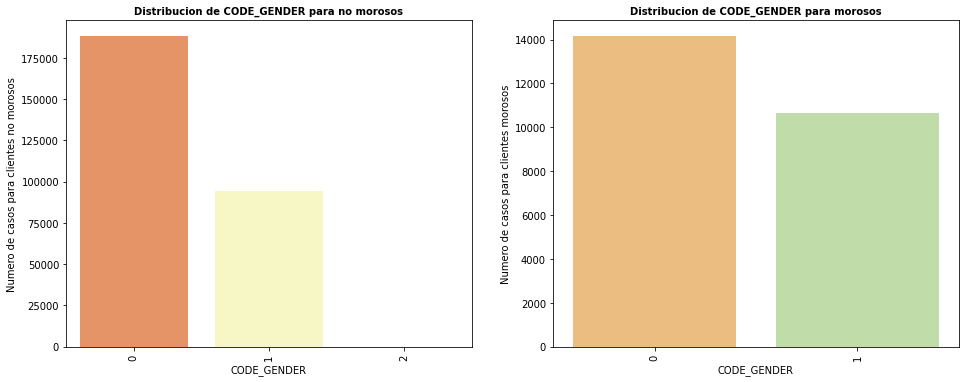

In [ ]:
#CODIGO DE GENERO
df_plot_unnivariate_cat('CODE_GENDER')

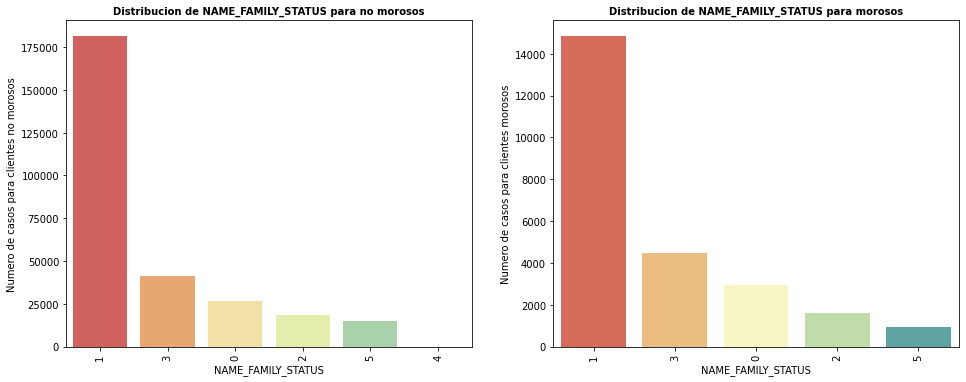

In [ ]:
#ESTADO DE LA FAMILIA
df_plot_unnivariate_cat('NAME_FAMILY_STATUS')

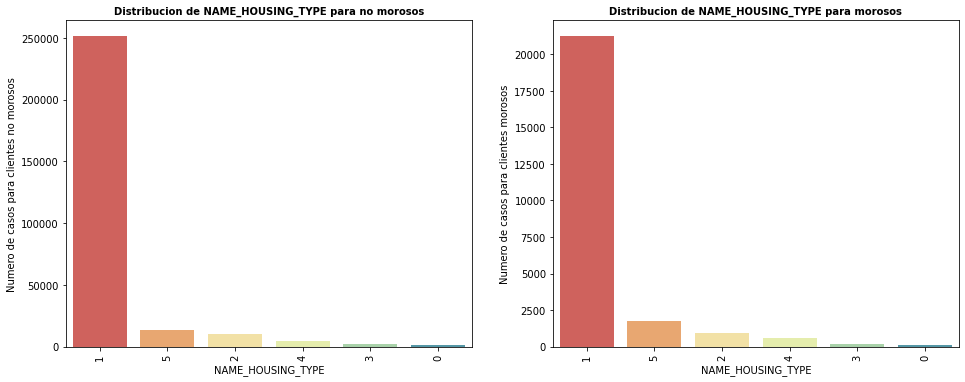

In [ ]:
#TIPO DE VIVIENDA
df_plot_unnivariate_cat('NAME_HOUSING_TYPE')

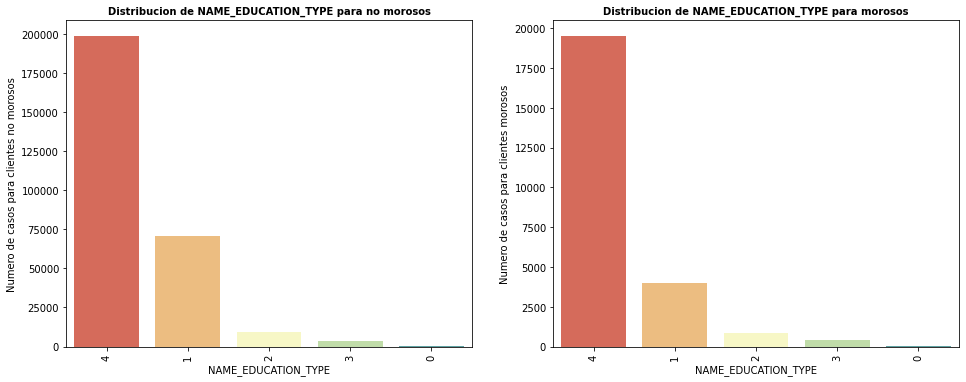

In [ ]:
#TIPO DE EDUCACION
df_plot_unnivariate_cat('NAME_EDUCATION_TYPE')

CARACTERISTICAS CONTINUAS UNIVARIADAS

In [ ]:
def df_plot_unnivariate_cont(var):
    
    plt.figure(figsize=(16,6))
    
    plt.subplot(1, 2, 1)
    sns.distplot(df0[var],color='tab:orange')
    plt.title('Distribucion de '+ '%s' %var +' para no morosos', weight='bold', fontsize=10)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Distribución normal para clientes no morosos')
    
    plt.subplot(1, 2, 2)
    sns.distplot(df1[var],color='tab:orange')
    plt.title('Distribution of '+ '%s' %var +' para morosos', weight='bold',fontsize=10)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Distribución normal para clientes morosos')
    
    plt.show()

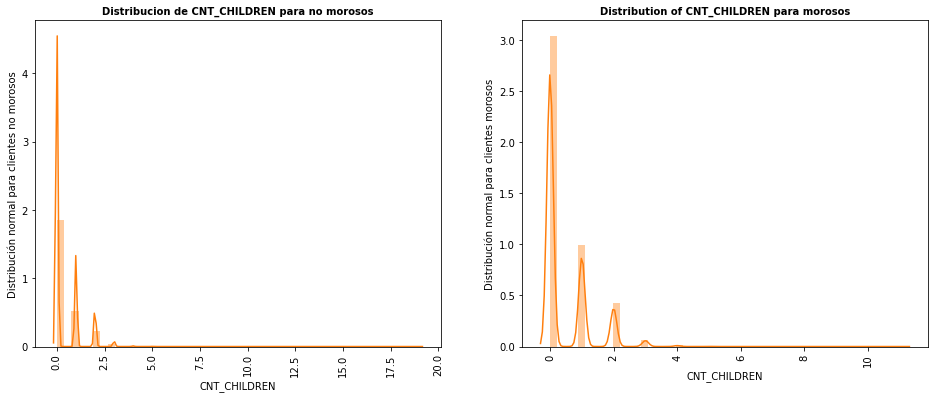

In [ ]:
df_plot_unnivariate_cont('CNT_CHILDREN')

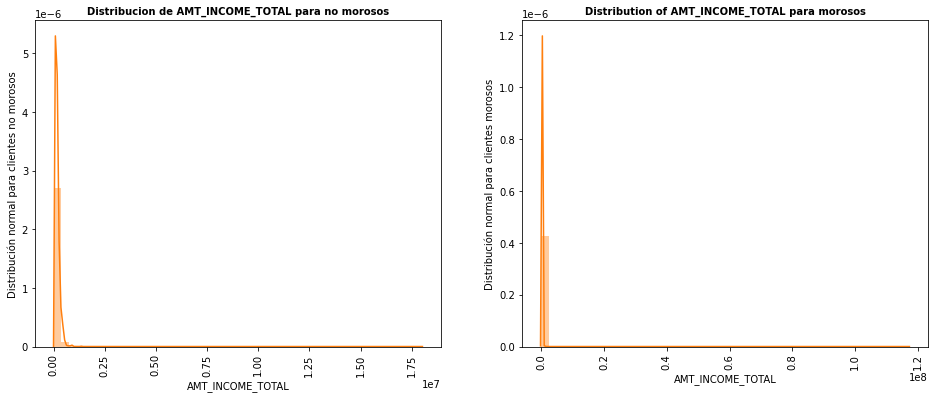

In [ ]:
#TOTAL DE INGRESOS
df_plot_unnivariate_cont('AMT_INCOME_TOTAL')

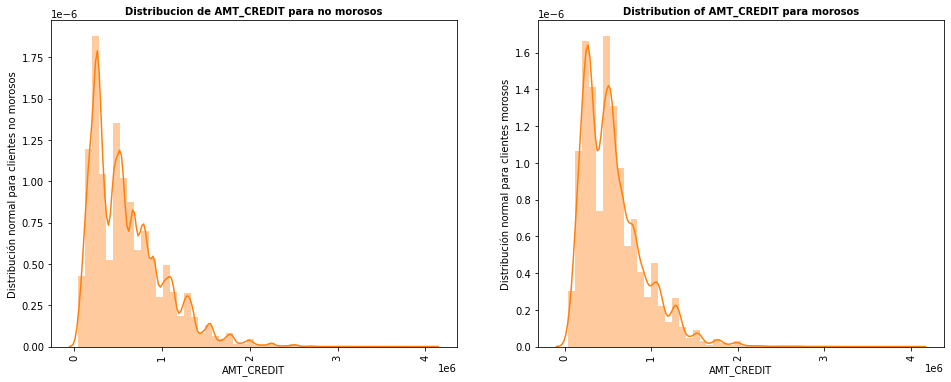

In [ ]:
#CANTIDAD DE CREDITO
df_plot_unnivariate_cont('AMT_CREDIT')

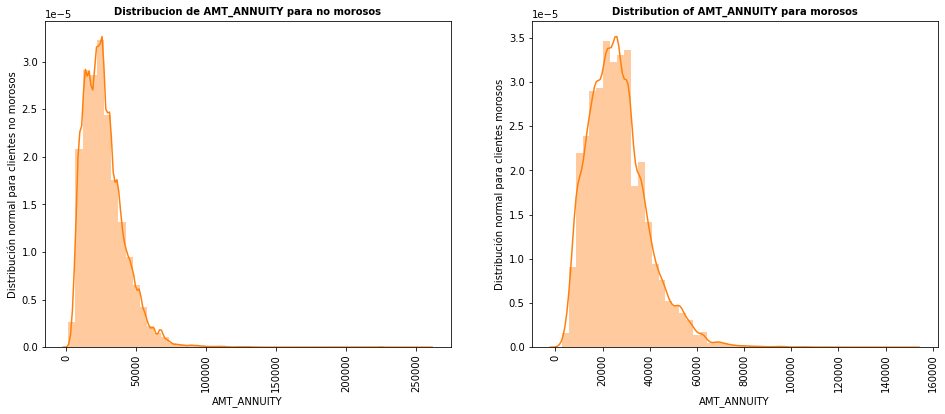

In [ ]:
#CANTIDAD DE ANUALIDAD
df_plot_unnivariate_cont('AMT_ANNUITY')

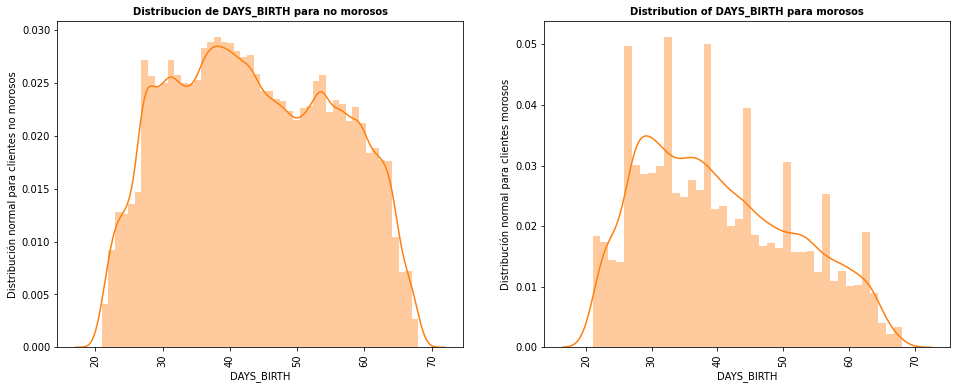

In [ ]:
#AÑOS DEL CLIENTE
df_plot_unnivariate_cont('DAYS_BIRTH')

Bivariado Categórico-Categórico

In [ ]:
def df_plot_bivariate_cat_cat(var,var_hue):
    
    plt.figure(figsize=(16,6))
    
    plt.subplot(1, 2, 1)
    sns.countplot(var,hue=var_hue, data=df0, palette= 'Spectral', order= df0[var].value_counts().index, hue_order=df0[var_hue].value_counts().index)
    plt.title('Distribucion de '+ '%s' %var +' para no morosos', weight='bold', fontsize=10)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Número de casos de clientes no morosos')
    
    plt.subplot(1, 2, 2)
    sns.countplot(var, hue=var_hue, data=df1, palette='Spectral', order= df1[var].value_counts().index, hue_order=df1[var_hue].value_counts().index)
    plt.title('Distribucion de '+ '%s' %var +' para morosos', weight='bold',fontsize=10)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Número de casos de clientes morosos')
    
    plt.show()

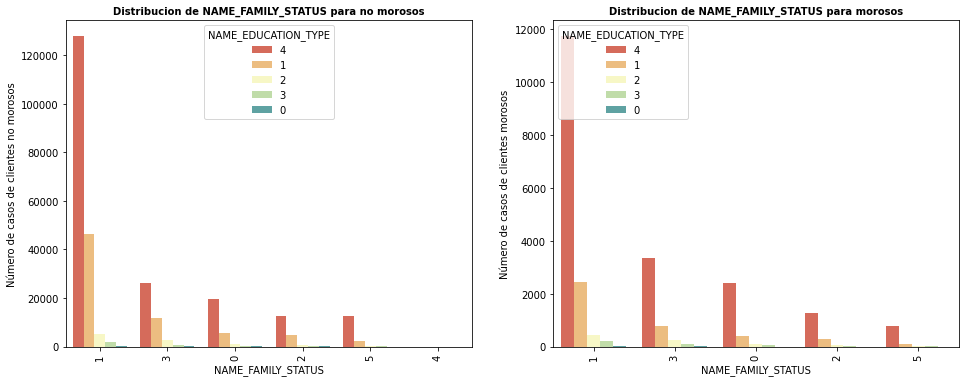

In [ ]:
#ESTADO DE LA FAMILIA Y TIPO DE EDUCACION
df_plot_bivariate_cat_cat('NAME_FAMILY_STATUS','NAME_EDUCATION_TYPE')

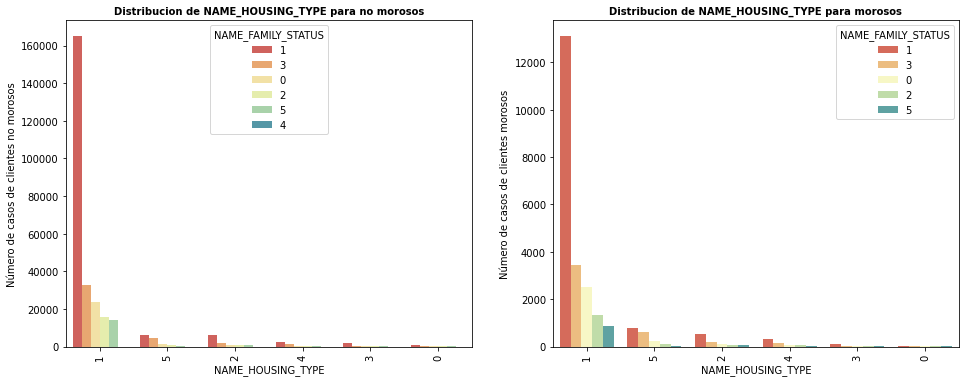

In [ ]:
#TIPO DE VIVIENDA Y ESTADO DE FAMILIA
df_plot_bivariate_cat_cat('NAME_HOUSING_TYPE','NAME_FAMILY_STATUS')

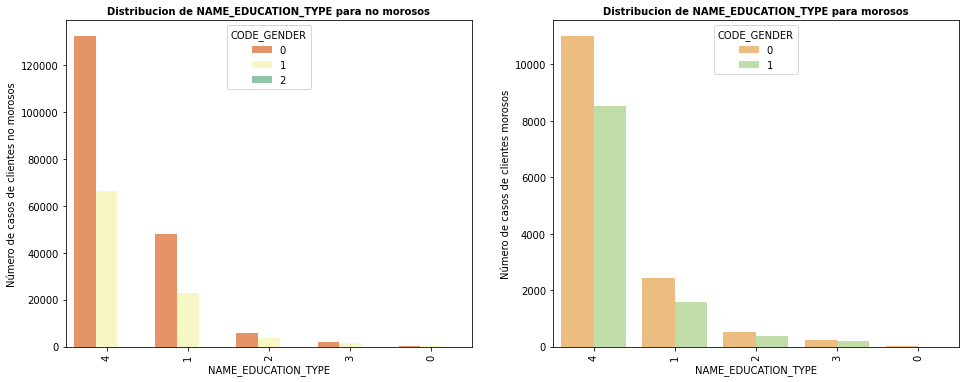

In [ ]:
#TIPO DE EDUCACION Y CODIGO DE GENERO
df_plot_bivariate_cat_cat('NAME_EDUCATION_TYPE','CODE_GENDER')

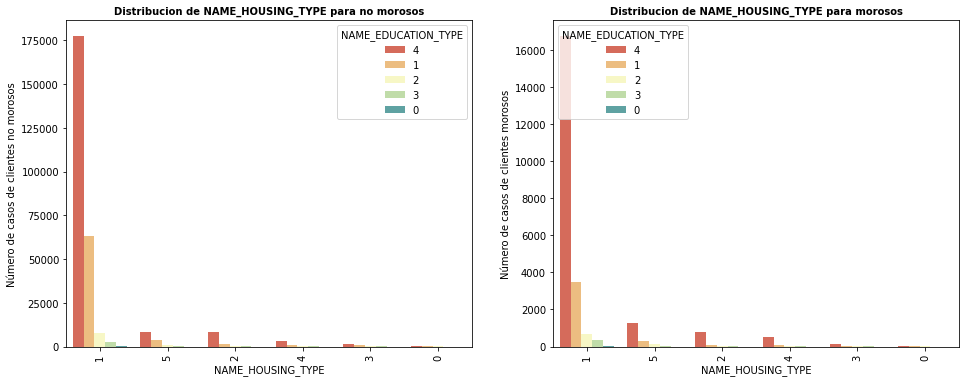

In [ ]:
#TIPO DE VIVIENDA Y EDUCACION
df_plot_bivariate_cat_cat('NAME_HOUSING_TYPE','NAME_EDUCATION_TYPE')

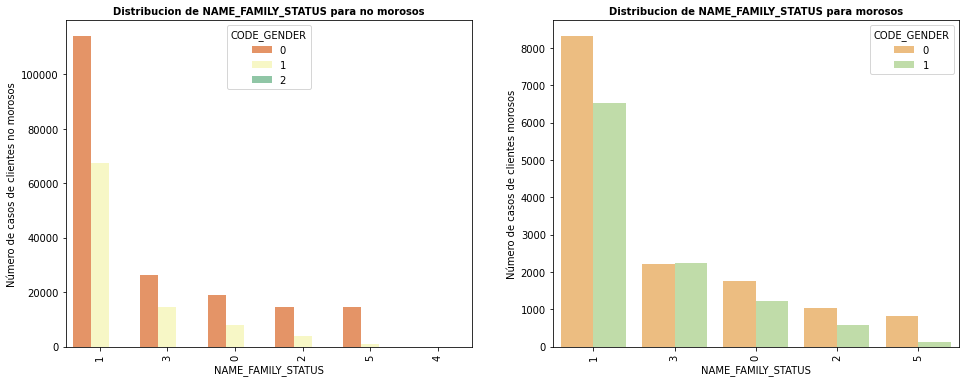

In [ ]:
#ESTADO DE FAMILIA Y CODIGO DE GENERO
df_plot_bivariate_cat_cat('NAME_FAMILY_STATUS','CODE_GENDER')

Bivariado Categórico-Continuo

In [ ]:
def df_plot_bivariate_cat_cont(var_cat,var_cont):
    
    plt.figure(figsize=(16,6))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x=var_cat,y=var_cont, data=df0, palette='Spectral', order= df0[var_cat].value_counts().index)
    plt.title('Distribucion de '+ '%s' %var_cat +' para no morosos', weight='bold', fontsize=10)
    plt.xlabel(var_cat)
    plt.xticks(rotation=90)
    plt.ylabel('%s' %var_cont+' para clientes morosos')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=var_cat, y=var_cont, data=df1, palette='Spectral', order= df1[var_cat].value_counts().index)
    plt.title('Distribucion de '+ '%s' %var_cat +' para morosos', weight='bold',fontsize=10)
    plt.xlabel(var_cat)
    plt.xticks(rotation=90)
    plt.ylabel('%s' %var_cont+' para clientes morosos')
    
    plt.show()

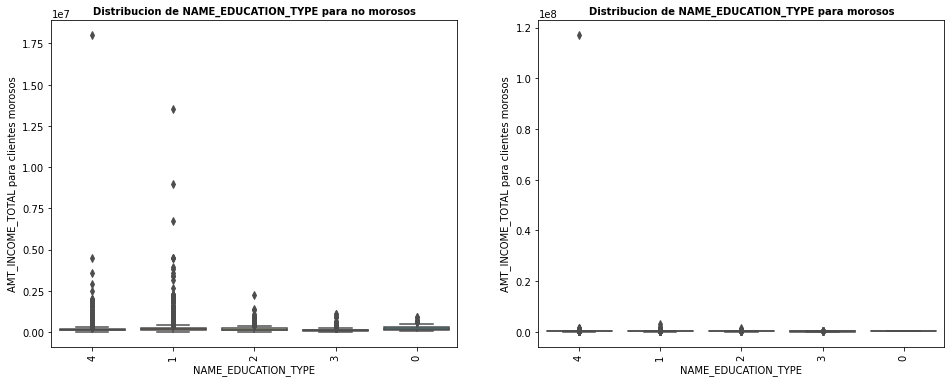

In [ ]:
#TIPO DE EDUCACION Y CANTIDAD DE INGRESOS TOTALES
df_plot_bivariate_cat_cont('NAME_EDUCATION_TYPE','AMT_INCOME_TOTAL')

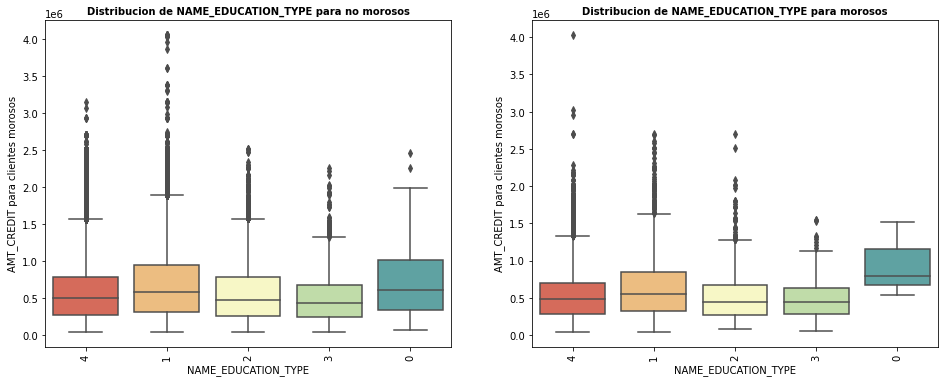

In [ ]:
#TIPO DE EDUCACION Y CANTIDAD DE CREDITO
df_plot_bivariate_cat_cont('NAME_EDUCATION_TYPE','AMT_CREDIT')

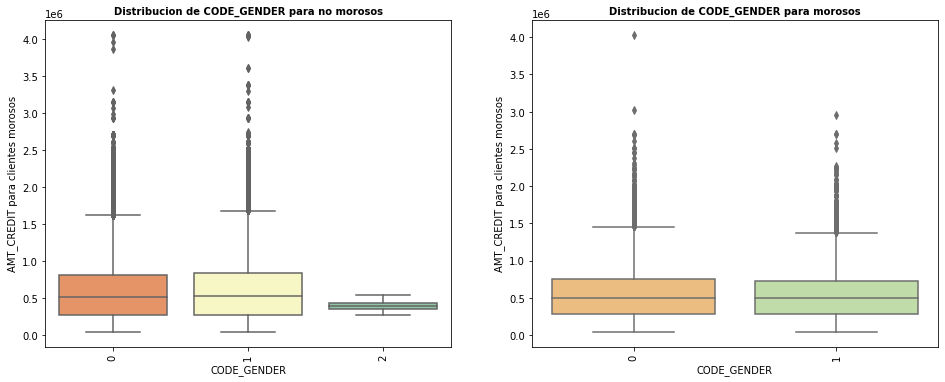

In [ ]:
#CODIGO DE GENERO Y CANTIDAD DE CREDITO
df_plot_bivariate_cat_cont('CODE_GENDER','AMT_CREDIT')

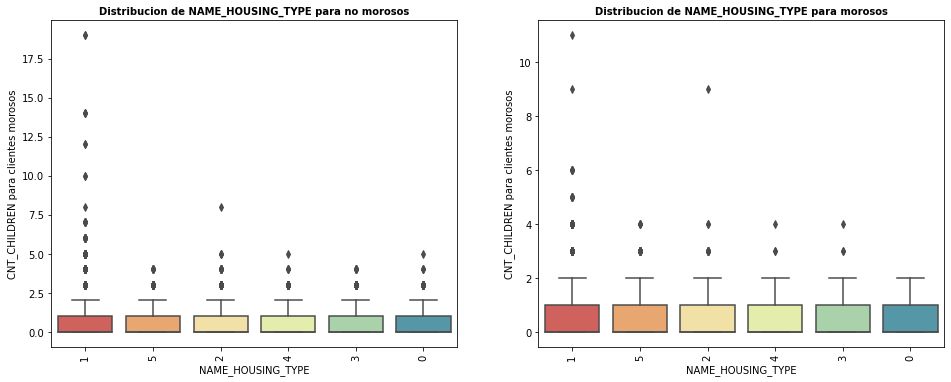

In [ ]:
#TIPO DE VIVIENDA Y CANTIDAD DE HIJOS
df_plot_bivariate_cat_cont('NAME_HOUSING_TYPE','CNT_CHILDREN')

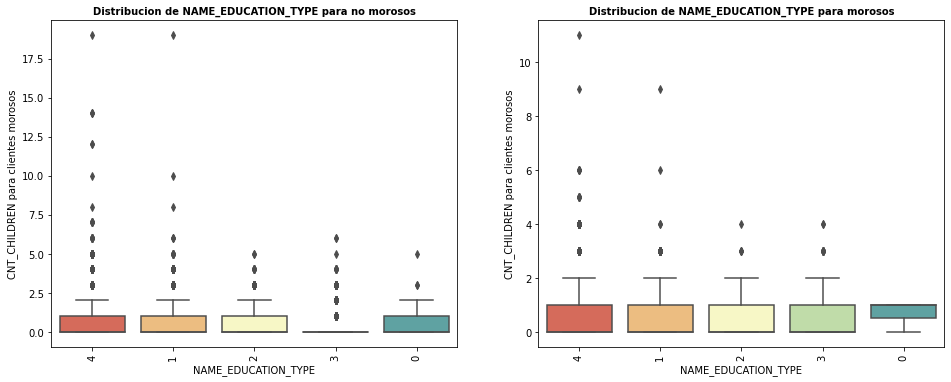

In [ ]:
#TIPO DE EDUCACION Y CANTIDAD DE HIJOS
df_plot_bivariate_cat_cont('NAME_EDUCATION_TYPE','CNT_CHILDREN')

Bivariado Continuo-Continuo

In [ ]:
def df_plot_bivariate_cont_cont(var_cont1,var_cont2):
    
    plt.figure(figsize=(18,6))
    
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=var_cont1,y=var_cont2, data=df0, palette='Spectral')
    plt.title('Distribucion de '+ '%s' %var_cont1 +' para no morosos', weight='bold', fontsize=10)
    plt.xticks(rotation=90)
    plt.ylabel('Distribucion de '+ '%s' %var_cont2)

    xIQR=1.5*(df0[var_cont1].quantile(.75)-df0[var_cont1].quantile(.25))
    xlowerlim=df0[var_cont1].quantile(.25)-xIQR
    xupperlim=df0[var_cont1].quantile(.75)+xIQR

    yIQR=1.5*(df0[var_cont2].quantile(.75)-df0[var_cont2].quantile(.25))
    ylowerlim=df0[var_cont2].quantile(.25)-yIQR
    yupperlim=df0[var_cont2].quantile(.75)+yIQR

    plt.ylim(ylowerlim,yupperlim)
    plt.xlim(xlowerlim,xupperlim)
    
    
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=var_cont1,y=var_cont2, data=df1, palette='Spectral')
    plt.title('Distribucion de '+ '%s' %var_cont1 +' para morosos', weight='bold',fontsize=10)

    plt.xticks(rotation=90)
    plt.ylabel('Distribucion de '+ '%s' %var_cont2)

    xIQR=1.5*(df1[var_cont1].quantile(.75)-df1[var_cont1].quantile(.25))
    xlowerlim=df1[var_cont1].quantile(.25)-xIQR
    xupperlim=df1[var_cont1].quantile(.75)+xIQR

    yIQR=1.5*(df1[var_cont2].quantile(.75)-df1[var_cont2].quantile(.25))
    ylowerlim=df1[var_cont2].quantile(.25)-yIQR
    yupperlim=df1[var_cont2].quantile(.75)+yIQR
    
    plt.ylim(ylowerlim,yupperlim)
    plt.xlim(xlowerlim,xupperlim)
    
    plt.show()

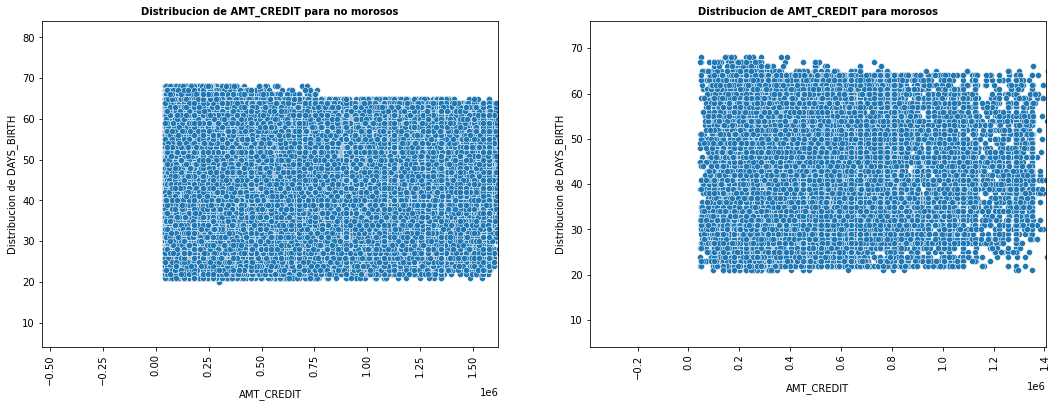

In [ ]:
#CANTIDAD DE CREDITO Y EDAD
df_plot_bivariate_cont_cont('AMT_CREDIT','DAYS_BIRTH')

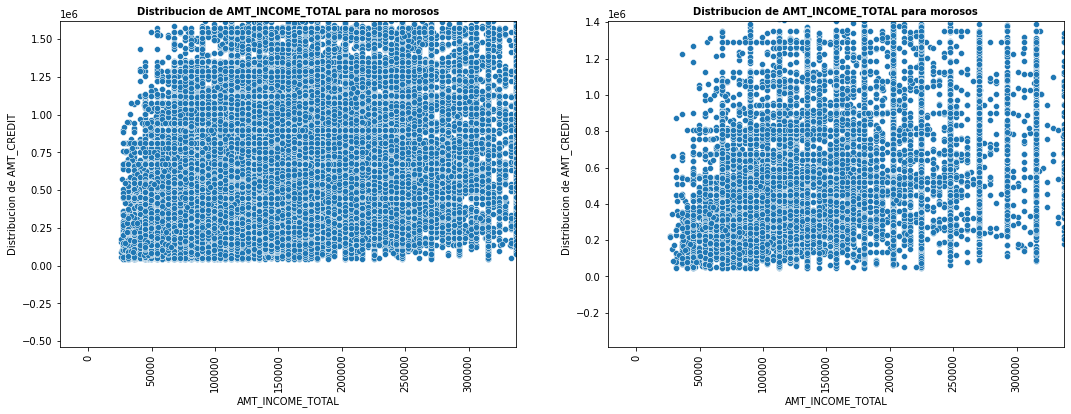

In [ ]:
#CANTIDAD INGRESOS TOTALES Y DE CREDITO
df_plot_bivariate_cont_cont('AMT_INCOME_TOTAL','AMT_CREDIT')

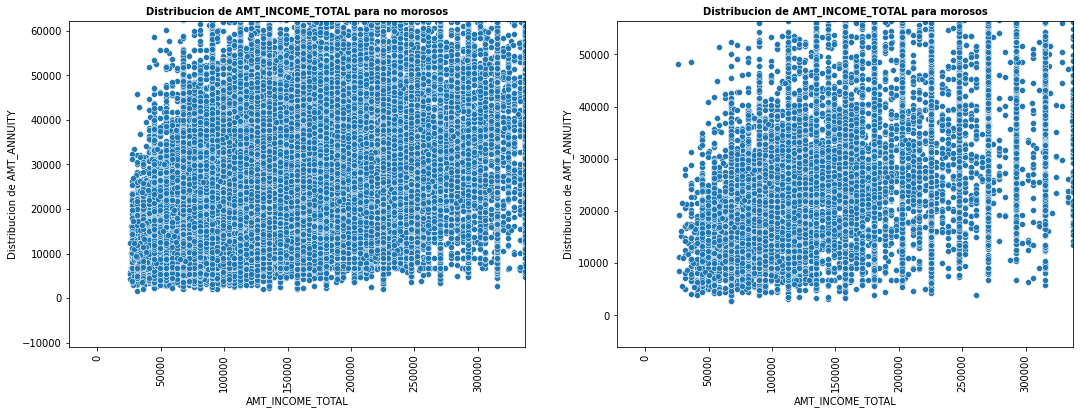

In [ ]:
#CANTIDAD DE INGRESOS TOTALES Y ANUALIDAD
df_plot_bivariate_cont_cont('AMT_INCOME_TOTAL','AMT_ANNUITY')

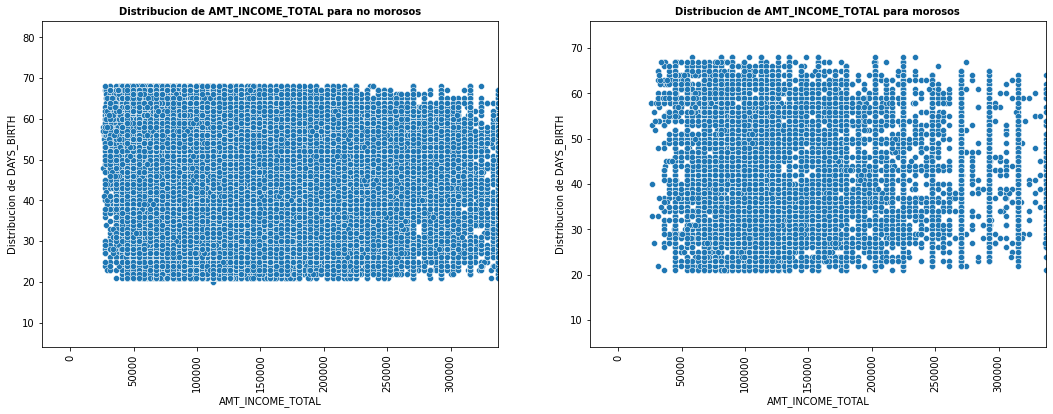

In [ ]:
#CANTIDAD DE INGRESOS TOTALES Y AÑOS DEL CLIENTE
df_plot_bivariate_cont_cont('AMT_INCOME_TOTAL','DAYS_BIRTH')

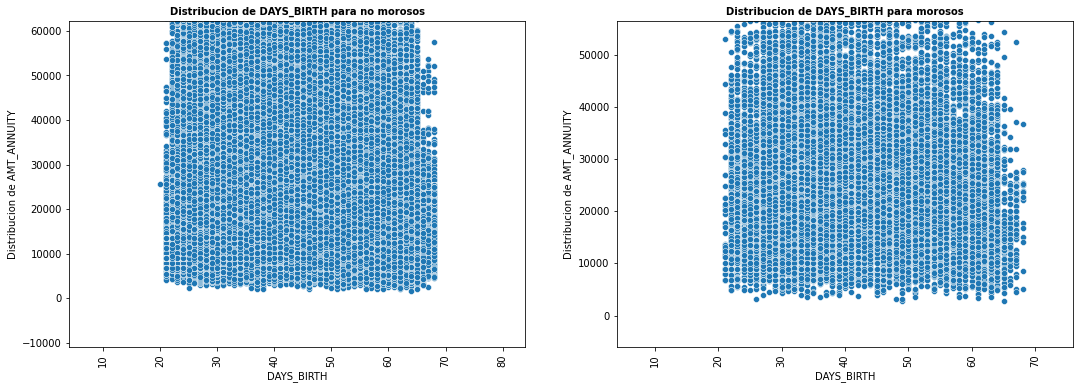

In [ ]:
#AÑOS DEL CLIENTE Y MONTO DE ANUALIDAD
df_plot_bivariate_cont_cont('DAYS_BIRTH','AMT_ANNUITY')

Correlacion (APLICATION DATA SET)

In [ ]:
def correlation_heatmap(var):
    plt.figure(figsize=(12,8))
    cor = var.corr()

    sns.heatmap(cor,annot=True,linewidths=.5,cbar_kws={"orientation": "horizontal"},cmap="Reds")
    plt.show()

    indices = np.where(cor > -1)
    indices = [(cor.index[x], cor.columns[y],abs(cor.iloc[x,y])) for x, y in zip(*indices) if x != y and x < y]
    a=sorted(indices, key=lambda x: x[2],reverse=True)
    print("Las diez principales correlaciones son:")
    for i in range(0,10):
        print('%d. '%(i+1)+a[i][0]+' and '+a[i][1])

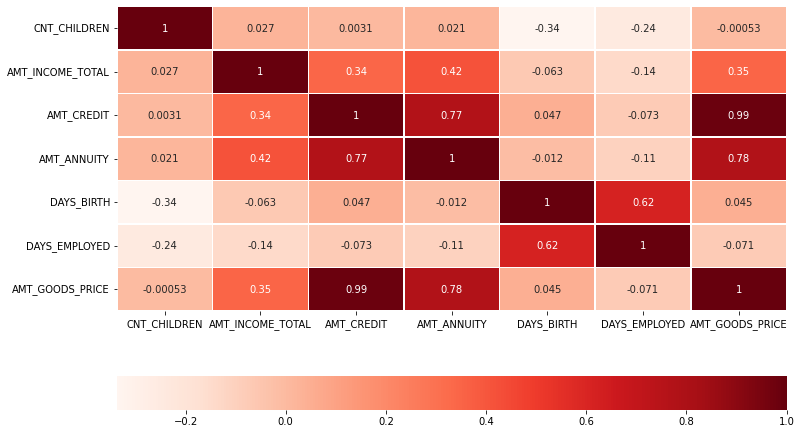

Las diez principales correlaciones son:
1. AMT_CREDIT and AMT_GOODS_PRICE
2. AMT_ANNUITY and AMT_GOODS_PRICE
3. AMT_CREDIT and AMT_ANNUITY
4. DAYS_BIRTH and DAYS_EMPLOYED
5. AMT_INCOME_TOTAL and AMT_ANNUITY
6. AMT_INCOME_TOTAL and AMT_GOODS_PRICE
7. AMT_INCOME_TOTAL and AMT_CREDIT
8. CNT_CHILDREN and DAYS_BIRTH
9. CNT_CHILDREN and DAYS_EMPLOYED
10. AMT_INCOME_TOTAL and DAYS_EMPLOYED


In [ ]:
#MATRIZ DE CORRELACION PARA NO MOROSOS
correlation_heatmap(df0[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED','AMT_GOODS_PRICE']])

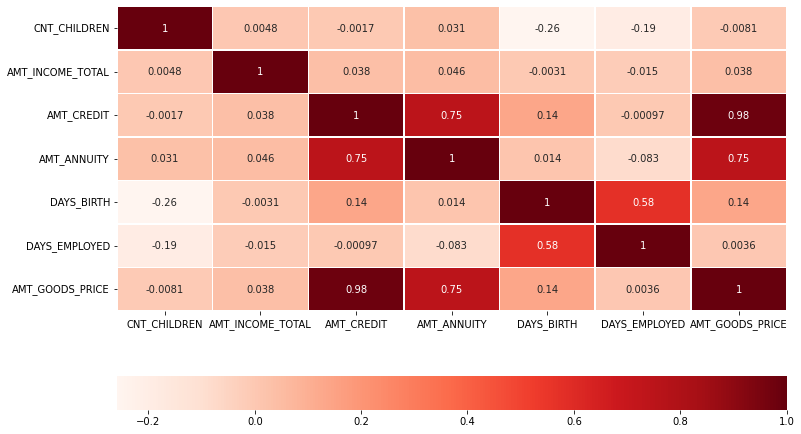

Las diez principales correlaciones son:
1. AMT_CREDIT and AMT_GOODS_PRICE
2. AMT_CREDIT and AMT_ANNUITY
3. AMT_ANNUITY and AMT_GOODS_PRICE
4. DAYS_BIRTH and DAYS_EMPLOYED
5. CNT_CHILDREN and DAYS_BIRTH
6. CNT_CHILDREN and DAYS_EMPLOYED
7. DAYS_BIRTH and AMT_GOODS_PRICE
8. AMT_CREDIT and DAYS_BIRTH
9. AMT_ANNUITY and DAYS_EMPLOYED
10. AMT_INCOME_TOTAL and AMT_ANNUITY


In [ ]:
#MATRIZ DE CORRELACION PARA MOROSOS
correlation_heatmap(df1[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH','DAYS_EMPLOYED','AMT_GOODS_PRICE']])

En relacion de nuestra matriz correlación pasaremos a modelar nuestra data.

# **MODELADO**

In [ ]:

y = df.TARGET.copy()
X = df.drop(['TARGET'], axis=1)

In [ ]:
#DIVIDIMOS EL CONJUNTO DE ENTRENAMIENTO Y TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
X_train

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
240610,378641,0,0,1,1,1,144000.0,332946.0,16015.5,238500.0,...,0,0,0,0,0,0.000,0.000000,0.000000,0.000000,0.000000
91527,206287,0,0,0,1,0,135000.0,284400.0,10345.5,225000.0,...,0,0,0,0,0,0.007,0.034362,0.267395,0.265474,1.899974
247813,386730,0,0,0,1,0,247500.0,562500.0,18274.5,562500.0,...,0,0,0,0,0,0.000,0.000000,0.000000,0.000000,2.000000
1679,101966,0,0,0,0,0,112500.0,180000.0,17662.5,180000.0,...,0,0,0,0,0,0.000,0.000000,0.000000,0.000000,5.000000
3771,104404,0,1,0,1,1,171000.0,1288350.0,37800.0,1125000.0,...,0,0,0,0,0,0.000,0.000000,0.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192476,323198,0,1,1,1,0,225000.0,781920.0,43659.0,675000.0,...,0,0,0,0,0,0.000,0.000000,1.000000,0.000000,0.000000
17730,120670,0,1,1,1,2,315000.0,1288350.0,41692.5,1125000.0,...,0,0,0,0,0,0.000,0.000000,0.000000,0.000000,4.000000
28030,132582,0,0,0,1,1,112500.0,227520.0,12834.0,180000.0,...,0,0,0,0,0,0.000,0.000000,0.000000,1.000000,2.000000
277869,421926,0,0,0,1,1,112500.0,566055.0,18256.5,472500.0,...,0,0,0,0,0,0.007,0.034362,0.267395,0.265474,1.899974


In [ ]:
X_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
58296,167580,0,0,0,1,0,157500.0,1174090.5,49873.5,1080000.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0
286459,431774,0,0,0,1,0,67500.0,227520.0,13189.5,180000.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
81217,194173,0,0,0,1,0,90000.0,90000.0,9351.0,90000.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,3.0
102593,219096,0,1,1,1,0,405000.0,640080.0,29970.0,450000.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,4.0
38837,144980,0,0,0,1,0,90000.0,302206.5,16524.0,229500.0,...,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117905,236715,0,0,0,1,0,144000.0,508495.5,24462.0,454500.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
63987,174197,0,0,0,1,0,76500.0,254700.0,16582.5,225000.0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,1.0
170652,297777,0,0,0,0,2,198900.0,2025000.0,53419.5,2025000.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0
137633,259619,0,0,0,1,0,90000.0,888840.0,29376.0,675000.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


MODELO DE REGRESION LOGISTICA

In [ ]:
#ENTRENAMOS LOS DATOS SEGUN EL MODELO DE REGRESION LOGISTICA
modelRegression = LogisticRegression(solver='liblinear')
modelRegression.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
#PRECIDIENDO CON EL MODELO PREVIAMENTE ENTRENADO
y_predict = modelRegression.predict(X_test)

In [ ]:
#CALCULANDO ALGUNAS METRICAS


results_df = pd.DataFrame(data=[["Regresion Logistica",  metrics.accuracy_score(y_test, y_predict), metrics.precision_score(y_test, y_predict),metrics.recall_score(y_test, y_predict) ]], 
                          columns=['Modelo', 'Accuracy', 'Precision', 'Recall'])
results_df

,Modelo,Accuracy,Precision,Recall
0,Regresion Logistica,0.918455,0.0,0.0


In [ ]:
#MATRIZ DE CONFUSION
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
print(cnf_matrix)

[[70609     0]
 [ 6269     0]]


Text(0.5, 15.0, 'Predicted')

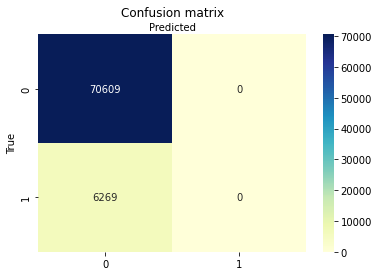

In [ ]:
#CREANDO GRAFICA DE MATRIZ DE CONFUSION
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

MODELO DE ANALISIS DISCRIMINANTE

In [ ]:
#ENTRENAMOS LOS DATOS SEGUN EL MODELO DE ANALISIS DISCRIMINANTE
modelDiscriminant = LinearDiscriminantAnalysis()
modelDiscriminant.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
#PRECIDIENDO CON EL MODELO PREVIAMENTE ENTRENADO
y_predict = modelDiscriminant.predict(X_test)

In [ ]:
#CALCULANDO ALGUNAS METRICAS

results_df_2 = pd.DataFrame(data=[["Analisis Discriminante",  metrics.accuracy_score(y_test, y_predict), metrics.precision_score(y_test, y_predict),metrics.recall_score(y_test, y_predict) ]], 
                          columns=['Modelo', 'Accuracy', 'Precision', 'Recall'])
results_df_2

,Modelo,Accuracy,Precision,Recall
0,Analisis Discriminante,0.918338,0.481328,0.018504


In [ ]:
#MATRIZ DE CONFUSION
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
print(cnf_matrix)

[[70484   125]
 [ 6153   116]]


Text(0.5, 15.0, 'Predicted')

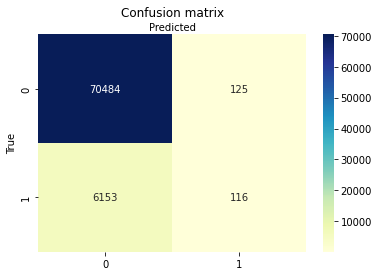

In [ ]:
#CREANDO GRAFICA DE MATRIZ DE CONFUSION
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# **COMPARACION DE LOS 2 MODELOS**

In [ ]:
# Cuadro Comparativo
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Modelo,Accuracy,Precision,Recall
0,Regresion Logistica,0.918455,0.000000,0.000000
1,Analisis Discriminante,0.918338,0.481328,0.018504


# **Conclusiones**

En base a los objetivos planteados en el proyecto se llegaron a las siguientes conclusiones:

1.   De la data obtenida con 122 características para determinar los clientes morosos del banco el 33% de sus características no fueron utilizadas ya que se realizó un análisis exploratorio de los datos y se procedió a tratarlos, ya que se halló varias características con el 50% de sus campos nulos; al terminar con el tratamiento de los datos quedaron 82 características útiles para determinar el objetivo de nuestro proyecto.

2.   Se realizó un análisis exploratorio exhaustivo a la data obtenida del banco que nos arrojó como resultado final 82 características con todos sus campos completos y categorizados listos para ser utilizados en los modelos de regresión logística y análisis de discriminante planteadas para el proyecto.

3. Se determinaron los modelos de regresión logística y análisis de discriminante para el presente proyecto con el objeto de predecir los posibles clientes morosos que puede tener el banco, para esto se dividió la data tratada con sus 82 características útiles de tal forma que un 25% se utilice para probar el modelo entrenado y un 75% para entrenar el modelo.

4. Se entrenaron los modelos de regresión logística y discriminante con el 75% de los datos útiles para determinar a los posibles clientes morosos obteniendo resultados poco coherentes con el modelo de regresión logística ya que nos arrojaba cero para las métricas de precision y recall mientras que el modelo de análisis discriminante nos arrojaba métricas más reales.

5. Al entrenar los dos modelos de predicción planteados en el proyecto se obtuvieron como resultados para el caso de la regresión logistica 0,918455 de accuaracy, 0 de precision y 0 de recall mientras que para el modelo de análisis discriminante se obtuvo 0,918338 de accuaracy, 0,481328 de precision y 0,018504 de recall, concluyendo así que el mejor modelo para nuestra predicción es el de análisis discriminante.

6. Después de identificar nuestro mejor modelo de predicción para nuestro proyecto, se realizó la matriz de confusión para el modelo de análisis discriminante obteniendo como resultados 70484 de verdaderos negativos (clientes no morosos), 125 falsos positivos (clientes no morosos), 6153 de falsos negativos (clientes morosos) y 116 verdaderos positivos (clientes morosos).